# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 8 - Normal modes and Schrodinger equation

In [87]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import random

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

In [88]:
N = 100
s = np.random.choice([-1,+1], N)

In [89]:
def calculate_energy(s, eps=1.0):
    E = 0.0
    for i in range(N-1):
        if s[i] == s[i+1]:
            E = E - eps
        else:
            E = E + eps
    return E

calculate_energy(s)      

-7.0

In [90]:
# Demon algorithm

steps = 50000
E_demon = 0.0

E_demon_list = []
E_list = []
dE_list = []

for i in range(steps):
    E_old = calculate_energy(s)
    
    # Change a random spin
    idx = np.random.randint(0,N)
    s_new = s.copy()
    s_new[idx] = np.random.choice([-1,+1])
    
    # New energy and dE
    E_new = calculate_energy(s_new)
    dE = E_new - E_old
    
    # Exchange of energy
    
    if dE < 0:
        E_demon = E_demon + abs(dE)
        s = s_new.copy()
    else:
        if dE < E_demon:
            E_demon = E_demon - dE
            s = s_new.copy()
    
    dE_list.append(dE)
    E_demon_list.append(E_demon)
    E_list.append(calculate_energy(s))

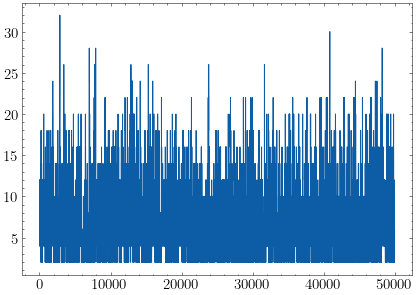

In [98]:
plt.plot(E_demon_list)

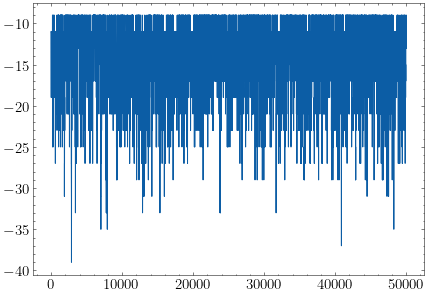

In [92]:
plt.plot(E_list)